In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [15]:
file_path = '/content/drive/My Drive/Colab Notebooks/capstone_nlp_2.csv'
df_safety_org = pd.read_csv(file_path)

In [16]:
df_safety_org.head(10)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


In [17]:
df_safety_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [18]:
df_safety_org['Accident Level'].unique()

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

In [19]:
import calendar

df_safety_org['year'] = pd.DatetimeIndex(df_safety_org['Data']).year
df_safety_org['month'] = pd.DatetimeIndex(df_safety_org['Data']).month
df_safety_org['day'] = pd.DatetimeIndex(df_safety_org['Data']).day


df_safety_org['month'] = df_safety_org['month'].apply(lambda x: calendar.month_name[x])

df_safety_org.drop(['Unnamed: 0', 'Data'] , axis=1, inplace=True)

In [20]:
df_safety_org.head(5)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,day
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January,1
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January,2
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January,6
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January,8
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January,10


In [21]:
df_safety_org[df_safety_org.duplicated()]

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,day
77,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...,2016,April,1
262,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...,2016,December,1
303,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...,2017,January,21
345,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...,2017,March,2
346,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...,2017,March,2
355,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...,2017,March,15
397,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...,2017,May,23


In [22]:
df_safety_org.drop_duplicates(inplace=True)

In [23]:
df_safety_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Countries                 418 non-null    object
 1   Local                     418 non-null    object
 2   Industry Sector           418 non-null    object
 3   Accident Level            418 non-null    object
 4   Potential Accident Level  418 non-null    object
 5   Genre                     418 non-null    object
 6   Employee or Third Party   418 non-null    object
 7   Critical Risk             418 non-null    object
 8   Description               418 non-null    object
 9   year                      418 non-null    int64 
 10  month                     418 non-null    object
 11  day                       418 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 42.5+ KB


Country_01    248
Country_02    129
Country_03     41
Name: Countries, dtype: int64


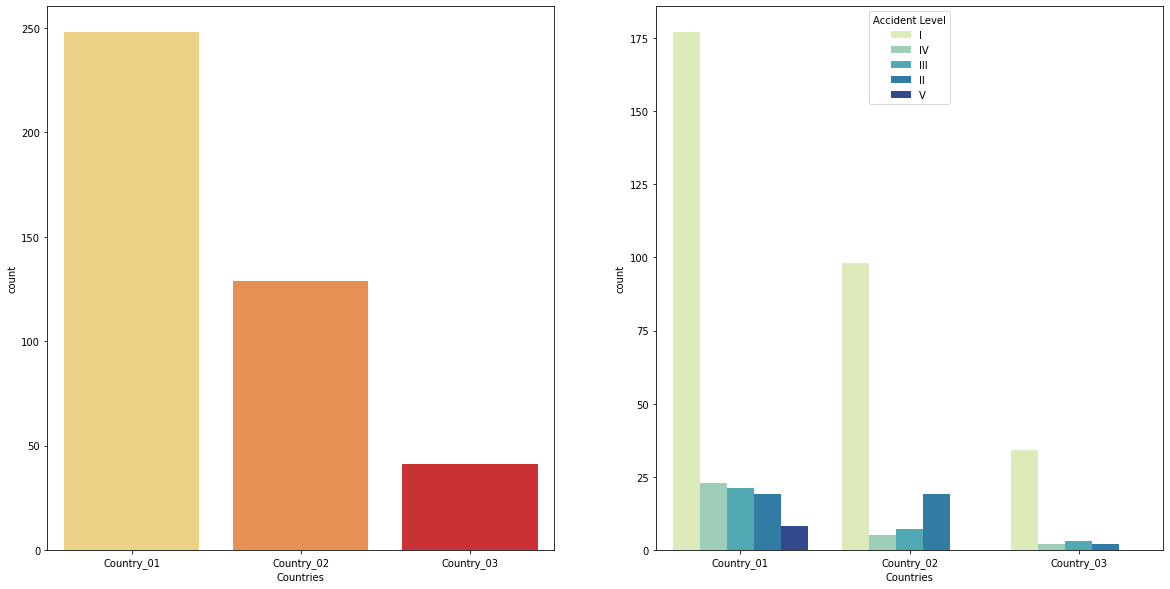

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df_safety_org['Countries'].value_counts())
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(data=df_safety_org, x='Countries', palette='YlOrRd')

plt.subplot(1,2,2)
sns.countplot(data=df_safety_org, x='Countries', hue='Accident Level', palette='YlGnBu')
plt.show()

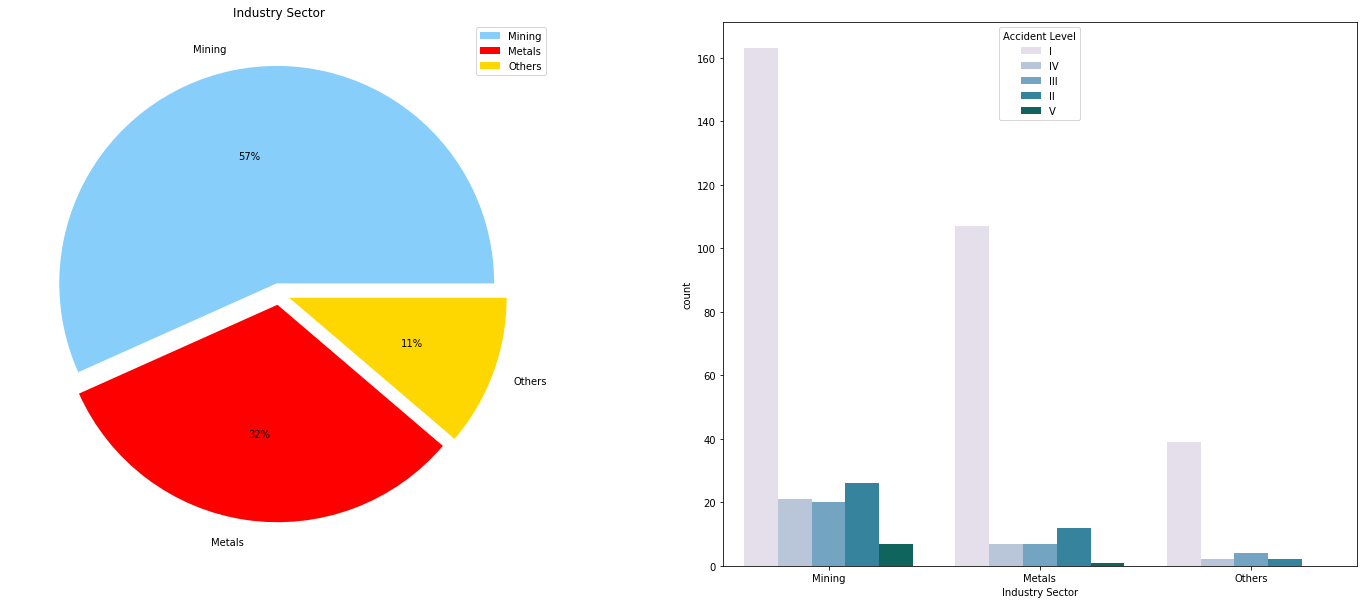

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 10))

df_sector = pd.DataFrame(df_safety_org['Industry Sector'].value_counts()).reset_index()
df_sector.columns = ['Sector', 'count']

colors = ['lightskyblue', 'red', 'gold']
labels = df_sector['Sector'].unique()
sector_count = df_sector['Sector'].nunique()

ax1.pie(df_sector['count'], labels = labels, colors=colors, explode=[0.05]*sector_count, autopct='%.0f%%')
ax1.set_title('Industry Sector')
ax1.legend(labels, loc = 'upper right')

sns.countplot(data=df_safety_org, x='Industry Sector', hue='Accident Level', palette='PuBuGn')


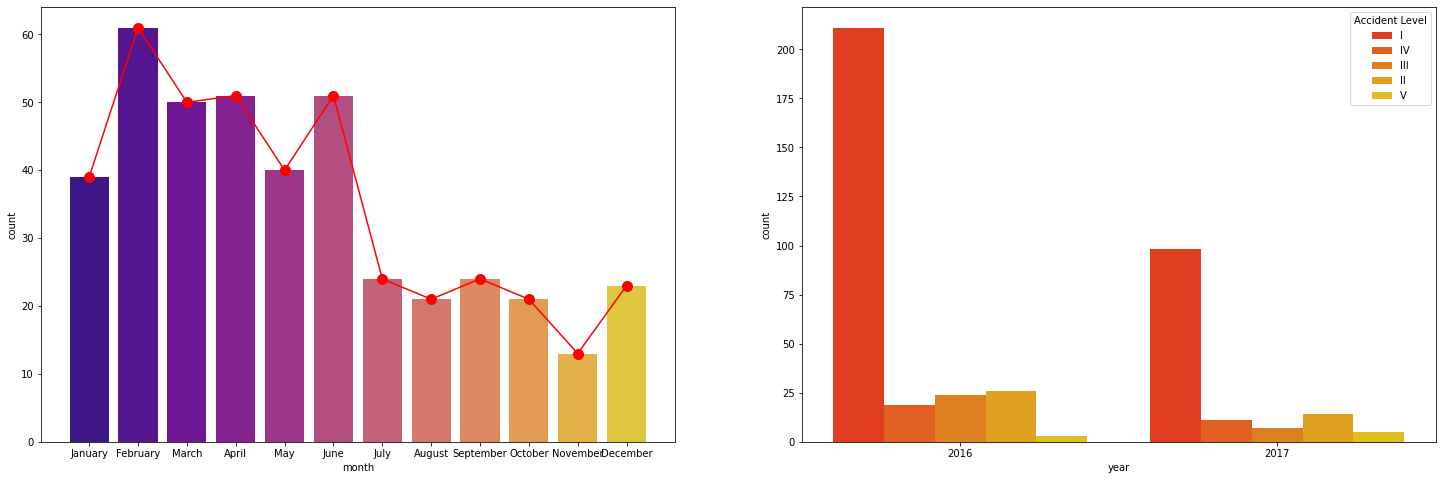

In [26]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)

sns.countplot(data=df_safety_org, x='month', palette='plasma')

df_safety_org['month'].value_counts()[df_safety_org['month'].unique()].plot(kind='line', marker='o', color='red', ms=10)

plt.subplot(1,2,2)
sns.countplot(data=df_safety_org, x='year', hue='Accident Level', palette='autumn')

plt.show()

Male      396
Female     22
Name: Genre, dtype: int64


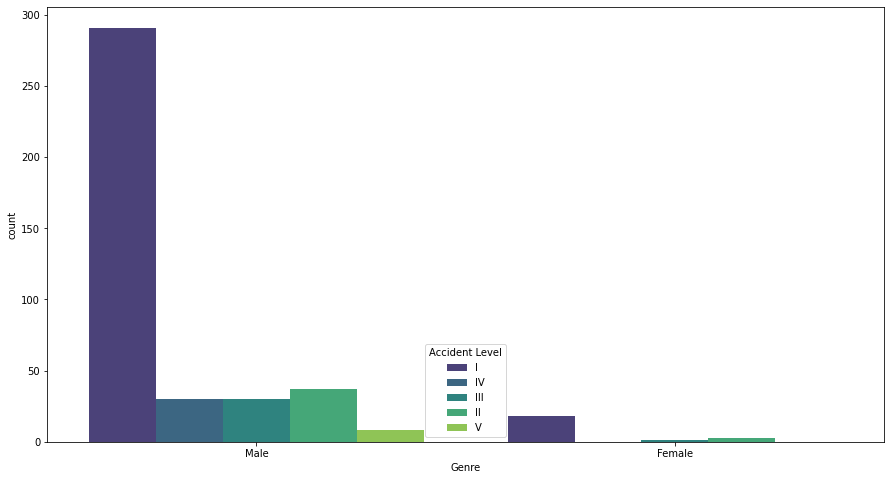

In [27]:
print(df_safety_org['Genre'].value_counts())

plt.figure(figsize=(15, 8))
sns.countplot(data=df_safety_org, x='Genre', hue='Accident Level', palette='viridis')
plt.show()

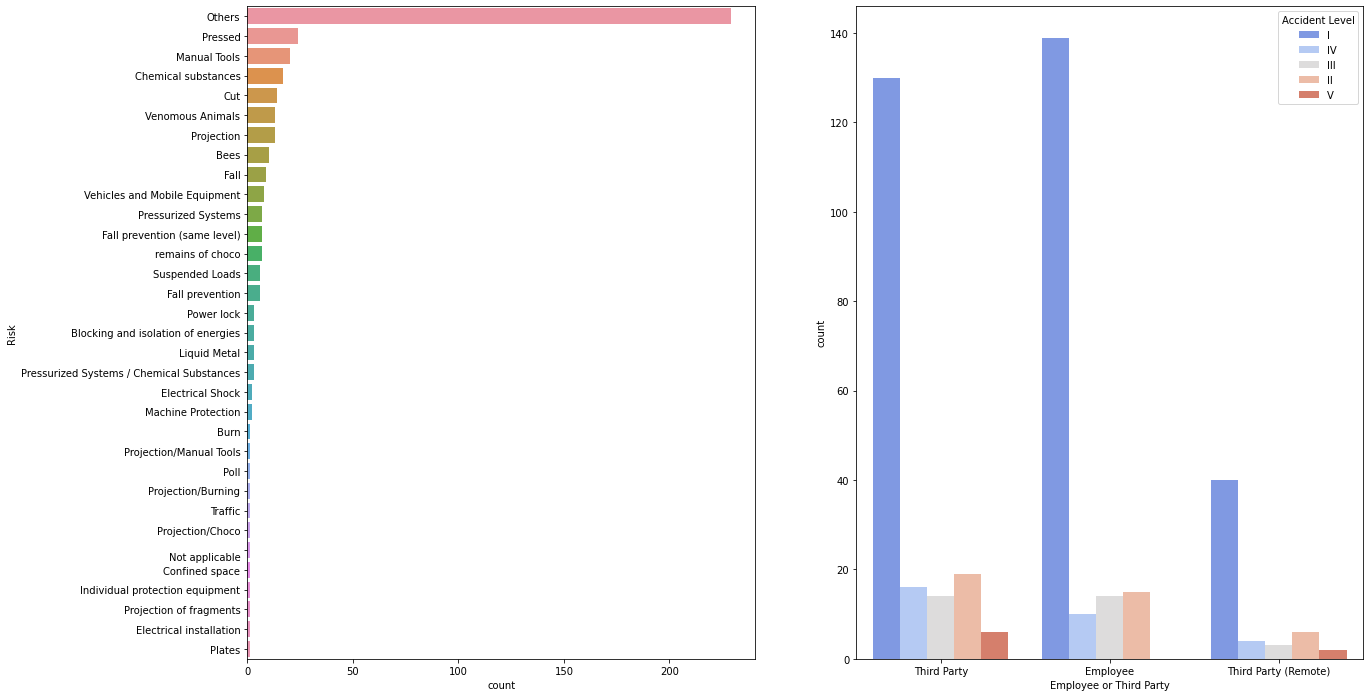

In [28]:
df_risk = pd.DataFrame(df_safety_org['Critical Risk'].value_counts()).reset_index()
df_risk.columns = ['Risk', 'count']

plt.figure(figsize=(20, 12))

plt.subplot(1,2,1)
sns.barplot(data=df_risk, x='count', y='Risk')

plt.subplot(1,2,2)
sns.countplot(data=df_safety_org, x='Employee or Third Party', hue='Accident Level', palette='coolwarm')

plt.show()

,Acc Level,count
0,I,309
1,II,40
2,III,31
3,IV,30
4,V,8


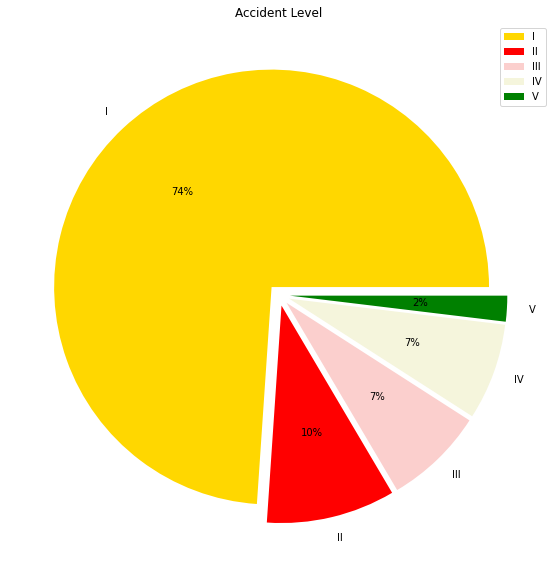

In [29]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 10))

df_acc_level = pd.DataFrame(df_safety_org['Accident Level'].value_counts()).reset_index()
df_acc_level.columns = ['Acc Level', 'count']

colors = ['gold', 'red', '#FBCFCD', '#F5F5DC', 'green']
labels = df_acc_level['Acc Level'].unique()
sector_count = df_acc_level['Acc Level'].nunique()

ax1.pie(df_acc_level['count'], labels = labels, colors=colors, explode=[0.05]*sector_count, autopct='%.0f%%')
ax1.set_title('Accident Level')
ax1.legend(labels, loc = 'upper right')

df_acc_level

### Findings

Country_01 has the maximum accidents, most of the accidents are low severe, Country_01 has more cases of severe accidents

Mining sector has the most accident cases 57%, also Mining has registered more cases of severe accidents

Most of the accidents have been reported during the first half of the year i.e. from Jan to June. Also 2016 regsitered most of the cases.

Most of the accidents have been reported by males. Severe accidents were not reported by the females

The accidents reported were the cases where the risks coming are not known.

Both Employees and Third party workers have been affected equally with the accidents. Remote users are not much affected with the incidents.

There are very low accidents of severe consequences, Most of the accidents reported (74%) are low risk.

In [30]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
import pandas as pd
import re, string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [31]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
sw = stopwords.words('english')
def clean_str(description):
  """
  String cleaning before vectorization
  """
  try:
    description = re.sub('[^\w\s]+', " ", description)
    description = re.sub(r"\s\s+", " ", description)
    description = re.sub(r"[^A-Za-z]", " ", description)         
    words = description.strip().lower().split()    
    words = [w for w in words if len(w)>=1]
    sentence = " ".join(words)
    final_sentence = [word.lower() for word in sentence.split() if word.lower() not in sw]
    return " ".join(final_sentence)
  except:
    print('Exception happened!!!!')
    return ""

In [33]:
lemmatizer = WordNetLemmatizer()
def lemmafunction(description):
  description = [lemmatizer.lemmatize(word)for word in description.split()]
  return " ".join(description)

In [34]:
df_safety_org['Desc_Clean'] = df_safety_org['Description']
df_safety_org['Desc_Clean'] = df_safety_org['Desc_Clean'].apply(clean_str)
df_safety_org['Desc_Clean'] = df_safety_org['Desc_Clean'].apply(lemmafunction)

In [35]:
df_safety_org.head(5)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,day,Desc_Clean
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,January,1,removing drill rod jumbo maintenance superviso...
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,January,2,activation sodium sulphide pump piping uncoupl...
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,January,6,sub station milpo located level collaborator e...
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,January,8,approximately nv cx ob personnel begin task un...
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,January,10,approximately circumstance mechanic anthony gr...


In [36]:
df_safety_org['Accident Level'] = LabelEncoder().fit_transform(df_safety_org['Accident Level']).astype(np.int8)

In [37]:
max_len = max(df_safety_org['Description'].apply(len))
print("Max length of the description :",max_len)

min_len = min(df_safety_org['Description'].apply(len))
print("Min length of the description :",min_len)

Max length of the description : 1029
Min length of the description : 94


In [38]:
max_len = max(df_safety_org['Desc_Clean'].apply(len))
print("Max length of the cleaned description :", max_len)

min_len = min(df_safety_org['Desc_Clean'].apply(len))
print("Min length of the cleaned description :", min_len)

Max length of the cleaned description : 657
Min length of the cleaned description : 61


In [39]:
from gensim.test.utils import get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = '/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt'
output_file = get_tmpfile('glove_embedd_output.txt')

glove2word2vec(glove_file, output_file)

(400000, 100)

In [40]:
from gensim.models import KeyedVectors

word_model = KeyedVectors.load_word2vec_format(output_file, binary=False)

In [41]:
word_model.get_vector('mechanic')

array([ 0.092167 , -0.019761 ,  0.1813   , -0.50002  ,  0.058457 ,
       -0.58594  ,  0.48234  ,  0.2431   ,  0.074173 ,  0.58317  ,
       -0.12075  , -0.66516  ,  0.38314  , -0.2446   , -0.16116  ,
       -0.26394  ,  0.33944  , -0.29907  ,  0.032936 ,  0.76142  ,
       -0.071226 ,  0.20826  ,  0.35741  , -0.83341  ,  0.52941  ,
       -0.67963  , -0.9745   , -0.39467  , -0.081891 ,  0.18699  ,
       -0.93819  ,  0.52726  , -0.5678   , -0.1547   , -0.29825  ,
        0.62389  , -0.3733   , -0.16246  ,  1.4281   , -0.37095  ,
        0.020044 ,  0.1696   ,  0.62212  , -0.43805  , -0.36631  ,
        0.58691  , -0.47203  ,  0.010555 ,  0.093671 , -0.15955  ,
       -0.62805  , -0.58127  , -0.30387  ,  0.8791   ,  0.45412  ,
        0.16492  , -0.43138  , -0.0033008,  0.8786   ,  0.8076   ,
        0.75746  ,  0.068688 ,  0.08175  ,  0.60248  , -0.25404  ,
       -0.18585  ,  0.50407  , -0.27367  , -0.45843  ,  0.65639  ,
       -0.65284  ,  0.13322  , -0.28345  , -0.12066  ,  0.2928

In [42]:
class Word2VecVectorizer:

  def __init__(self, model):
    self.word_model = model

  def transform(self, data):
    word_v = self.word_model.get_vector('king')

    X = np.zeros((len(data), word_v.shape[0]))
    emptycount = 0
    n = 0
    for sentence in data:
      vec = []
      tokens = sentence.split()
      for word in tokens:
        try:
          embedding = self.word_model.get_vector(word)
          vec.append(embedding)
        except KeyError:
          pass
      if(len(vec) > 0):
        vec = np.array(vec)
        X[n] = vec.sum(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    
    return X/np.linalg.norm(X)

  def fit_transform(self, data):
    return self.transform(data)


In [43]:
train_data = df_safety_org['Desc_Clean']

wordVectorizer = Word2VecVectorizer(word_model)
train_data = wordVectorizer.fit_transform(train_data)

Numer of samples with no words found: 0 / 418


In [44]:
df_safety_org['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [45]:
X = train_data
y = df_safety_org['Accident Level']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [47]:
X_train.shape

(334, 100)

In [48]:
y_train.reset_index(drop=True, inplace=True)

In [49]:
df_unscaled = pd.concat([pd.DataFrame(X_train), y_train], axis=1, ignore_index=True)
df_unscaled.columns = [*df_unscaled.columns[:-1], 'Accident Level']
df_unscaled.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Accident Level
0,-0.000912,0.000309,0.004592,-0.000118,-0.000924,-0.000877,-0.001819,0.008326,0.002574,0.002026,0.005393,-0.002358,0.004331,0.000916,0.002397,-0.003678,-0.002167,0.001914,-0.003616,-0.001429,0.002210,0.002215,0.002054,-0.002776,0.006832,-0.002214,-0.006379,-0.004911,0.000493,-0.000295,-0.002434,0.002378,-0.000587,0.003236,0.002263,0.002369,-0.001681,-0.001180,0.004622,-0.001149,...,0.007089,0.000643,0.007778,0.006559,0.001063,0.005014,-0.003121,0.000124,-0.002264,-0.005011,-0.002437,0.002363,-0.004746,0.006909,0.000870,0.003838,0.001346,-0.004558,-0.000147,0.007854,0.000802,-0.006459,0.000910,-0.016493,-0.001111,0.003004,-0.002025,-0.004367,-0.001373,0.000576,0.000665,0.001478,0.003509,-0.002849,0.001828,0.000454,-0.000565,0.012244,-0.002991,0
1,-0.002544,0.003882,0.000272,-0.002541,0.000740,0.002268,-0.000470,0.005305,-0.000997,0.002353,0.001675,-0.001238,0.004534,0.002483,0.001619,-0.002067,0.001726,0.002722,-0.000342,-0.003483,0.000865,0.000456,0.000480,-0.000828,0.004216,-0.000381,-0.003409,-0.004361,0.001901,-0.003855,-0.001544,0.003263,-0.003336,-0.001335,-0.000312,0.000985,-0.003090,-0.001488,-0.000120,0.000169,...,0.010491,-0.004520,0.003387,0.009747,0.000109,0.008121,-0.001660,-0.002371,-0.005683,-0.000255,0.001616,0.001638,-0.000410,0.004758,0.000278,-0.003085,-0.000406,-0.005351,0.001946,0.007970,0.001476,-0.007779,0.003677,-0.015323,-0.002563,0.002160,0.001130,-0.001794,-0.002614,-0.001180,-0.003460,-0.000668,-0.001515,-0.002302,-0.000584,-0.001073,-0.003135,0.006839,-0.001795,0
2,-0.000374,-0.000748,0.001692,-0.001164,0.001946,-0.001315,0.000306,0.000905,-0.000902,0.001255,-0.000396,0.000503,0.000472,0.001942,0.000793,-0.001407,-0.000416,0.000088,-0.000308,-0.000944,0.002051,-0.001766,0.000257,-0.000283,0.001806,-0.000281,-0.000514,-0.002681,0.001132,0.000189,-0.000827,0.002301,-0.001145,0.000909,-0.000505,0.000294,0.000348,0.000221,0.000358,0.001403,...,0.003401,-0.000821,0.001319,0.004454,0.001070,0.002974,0.000198,0.002366,0.000028,0.000680,-0.000646,0.000575,-0.001349,0.001171,0.000025,0.000034,-0.000224,-0.002977,0.000540,0.003675,0.000610,-0.004055,0.001383,-0.006572,-0.001075,0.002344,-0.000942,0.000781,-0.000795,-0.000318,0.000121,-0.000939,-0.000400,-0.002825,0.000527,0.001016,-0.001794,0.005360,-0.002761,0
3,-0.002256,0.001217,0.001353,-0.000905,0.001084,0.000211,-0.001263,0.001803,-0.000115,0.000587,-0.000986,0.001778,0.002462,0.003157,0.001725,-0.001335,-0.000348,-0.000806,0.000513,-0.002264,0.000840,0.000581,-0.000369,0.001772,0.003896,0.001533,-0.002267,-0.003868,0.000673,-0.000859,0.001470,0.002873,0.000879,-0.001703,-0.000146,0.000182,-0.001186,0.000575,0.000381,0.003224,...,0.005940,-0.001016,0.002566,0.003451,-0.000476,0.001780,0.000603,0.002499,-0.001934,-0.000954,0.000086,0.001295,-0.001711,0.001013,-0.001225,-0.000726,0.000962,-0.001193,0.000481,0.003987,-0.000541,-0.005640,-0.000077,-0.006415,-0.002467,0.001917,0.001768,0.000121,0.001143,0.000157,-0.001397,-0.001793,0.001322,-0.002131,-0.000793,0.000072,-0.001591,0.006021,-0.001923,0
4,-0.002934,0.002218,-0.000137,-0.004740,-0.002729,0.001050,-0.000211,0.002174,0.002219,0.002801,0.001443,0.000536,0.003488,0.000837,0.002498,-0.000443,-0.000029,-0.000440,0.001262,-0.004699,0.001810,0.000617,-0.000171,-0.000074,0.007148,0.002037,-0.005280,-0.002748,0.001562,-0.001326,0.000334,0.002174,-0.000208,0.000890,-0.001499,0.000133,0.000187,0.000940,0.002681,-0.000296,...,0.004916,-0.000843,0.007096,0.006336,0.000855,0.005285,-0.003335,-0.001770,-0.003887,-0.002089,-0.000799,0.002810,-0.002197,0.003309,-0.000400,0.000856,0.001633,-0.002650,0.003621,0.005139,0.001533,-0.007575,0.001659,-0.009992,-0.002353,0.003797,0.001975,-0.003002,-0.003229,-0.000599,-0.001134,0.000144,0.000331,0.000138,-0.001034,0.000226,-0.00

In [50]:
from sklearn.utils import resample

accident_lvl_0 = df_unscaled[df_unscaled['Accident Level'] == 0]
accident_lvl_1 = df_unscaled[df_unscaled['Accident Level'] == 1]
accident_lvl_2 = df_unscaled[df_unscaled['Accident Level'] == 2]
accident_lvl_3 = df_unscaled[df_unscaled['Accident Level'] == 3]
accident_lvl_4 = df_unscaled[df_unscaled['Accident Level'] == 4]


df_accident_lvl_1_upscaled = resample(accident_lvl_1, replace=True, n_samples=len(accident_lvl_0), random_state=1)
df_accident_lvl_2_upscaled = resample(accident_lvl_2, replace=True, n_samples=len(accident_lvl_0), random_state=1)
df_accident_lvl_3_upscaled = resample(accident_lvl_3, replace=True, n_samples=len(accident_lvl_0), random_state=1)
df_accident_lvl_4_upscaled = resample(accident_lvl_4, replace=True, n_samples=len(accident_lvl_0), random_state=1)


df_upscale = pd.concat([accident_lvl_0, df_accident_lvl_1_upscaled, df_accident_lvl_2_upscaled, df_accident_lvl_3_upscaled, df_accident_lvl_4_upscaled])

df_upscale['Accident Level'].value_counts()

4    247
3    247
2    247
1    247
0    247
Name: Accident Level, dtype: int64

In [51]:
X_train = df_upscale.drop(['Accident Level'], axis=1)
y_train = df_upscale['Accident Level']

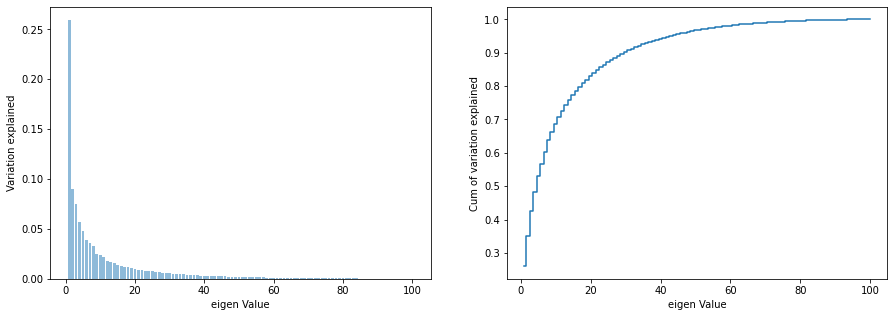

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=X_train.shape[1])

pca.fit(X_train_scaled)


plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.bar(list(range(1, X_train.shape[1]+1)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')

plt.subplot(1,2,2)
plt.step(list(range(1,X_train.shape[1]+1)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


In [53]:
from sklearn.pipeline import Pipeline

pca = PCA(n_components=40)
scaler = StandardScaler()

pipeline = Pipeline([
      ('scaler', scaler),
      ('pca', pca)
      ])

X_train_pca = pipeline.fit_transform(X_train)
X_test_pca = pipeline.fit_transform(X_test)

In [56]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

get_ipython().system_raw("mlflow ui --port 5000 &")

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

     |████████████████████████████████| 15.5 MB 5.1 MB/s 
     |████████████████████████████████| 180 kB 57.8 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 1.1 MB 60.6 MB/s 
     |████████████████████████████████| 146 kB 43.0 MB/s 
     |████████████████████████████████| 596 kB 58.2 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
MLflow Tracking UI: https://9cf2-34-73-238-113.ngrok.io


In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import mlflow

def Model_Report(X_train, y_train, X_val, y_val):

  models = ['LR', 'SVC', 'RF', 'ADA', 'ExTC', 'KNN', 'LGBM', 'XGB']

  clfs = [
          LogisticRegression(random_state=1),
          SVC(random_state=1, probability=True),
          RandomForestClassifier(n_jobs=10, random_state=1),
          AdaBoostClassifier(random_state=1),
          ExtraTreesClassifier(random_state=1, n_jobs=10),
          KNeighborsClassifier(n_jobs=10),
          LGBMClassifier(n_jobs=10, random_state=1),
          XGBClassifier(n_jobs=10, random_state=1)
        ]

  params = {
          models[0]: {'penalty': ['l1', 'l2'], 'C': [0.1,1,10]},
          models[1]: {'C': [1,10], 'gamma':[0.01,0.1,1]},
          models[2]: {'n_estimators': [10, 100], 'max_depth': [10, 15]},
          models[3]: {'n_estimators': [100,200], 'learning_rate': [0.1, 1]},
          models[4]: {'n_estimators': [10, 100], 'max_depth': [10, 15]},
          models[5]: {'n_neighbors': [2, 5, 8], 'weights': ['uniform', 'distance']},
          models[6]: {'n_estimators': [100], 'learning_rate': [0.01, 0.1]},
          models[7]: {'n_estimators': [100, 200], 'gamma': [0.01, 0.1]}

      }

  result = {}

  for name, estimator in zip(models, clfs):
    print('')
    print("Performing : " + name)

    clf = GridSearchCV(estimator, params[name], cv=5)

    with mlflow.start_run(run_name="MLflow Captstone Project"):

      clf.fit(X_train, y_train)

      print("best params: " + str(clf.best_params_))
      print("best scores: " + str(round(clf.best_score_,3)))

      for key, value in clf.best_params_.items():
        mlflow.log_param(key, value)

      y_pred = clf.predict(X_val)
      acc = accuracy_score(y_val, y_pred)

      df_report = classification_report(y_val, y_pred)
      print(df_report)

      clf_train_score = round(clf.best_score_,3)
      clf_recall = round((metrics.recall_score(y_val, y_pred, average='weighted')), 3)   
      clf_precision = round((metrics.precision_score(y_val, y_pred, average='weighted')), 3) 
      clf_f1score = round((metrics.f1_score(y_val, y_pred, average='weighted')),3)

      mlflow.log_metric('Training Score', clf_train_score)
      mlflow.log_metric('Accuracy', acc)
      mlflow.log_metric('Recall', clf_recall)
      mlflow.log_metric('Precision', clf_precision)
      mlflow.log_metric('F1 score', clf_f1score)
      mlflow.sklearn.log_model(clf.estimator, 'model')
      
    result[name] = [clf_train_score, acc, clf_recall, clf_precision, clf_f1score]

  result_tab = pd.DataFrame(np.array(list(result.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                          columns= ['Training Score', 'Accuracy', 'Recall', 'Precision', 'F1 score'],
                        index= result.keys())   # use the model names as index

  result_tab.index.name = 'Model'

  return result_tab, clf

In [58]:
result, clf= Model_Report(X_train_pca, y_train, X_test_pca, y_test)
result


Performing : LR
best params: {'C': 10, 'penalty': 'l2'}
best scores: 0.802
              precision    recall  f1-score   support

           0       0.76      0.26      0.39        62
           1       0.17      0.50      0.25         8
           2       0.00      0.00      0.00         6
           3       0.15      0.33      0.21         6
           4       0.10      0.50      0.17         2

    accuracy                           0.27        84
   macro avg       0.24      0.32      0.20        84
weighted avg       0.59      0.27      0.33        84


Performing : SVC
best params: {'C': 1, 'gamma': 1}
best scores: 0.987
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                          

,Training Score,Accuracy,Recall,Precision,F1 score
Model,,,,,
LR,0.802,0.273810,0.274,0.592,0.327
SVC,0.987,0.738095,0.738,0.545,0.627
RF,0.984,0.738095,0.738,0.545,0.627
ADA,0.354,0.095238,0.095,0.382,0.086
ExTC,0.987,0.738095,0.738,0.545,0.627
KNN,0.945,0.630952,0.631,0.585,0.604
LGBM,0.972,0.630952,0.631,0.529,0.575
XGB,0.970,0.571429,0.571,0.570,0.570


In [138]:
X = train_data
y = df_safety_org['Accident Level']

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [143]:
from tensorflow.keras.utils import to_categorical

classes = y_train_NN.nunique()

y_train_NN = to_categorical(y_train_NN, num_classes=classes)
y_test_NN = to_categorical(y_test_NN, num_classes=classes)

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

def getNN_model(X_train, y_train, X_test, y_test, trace):

  es = EarlyStopping(monitor='val_loss', mode='min', patience=7, min_delta=1E-3)
  mc = ModelCheckpoint('accident_model_NN.h5', monitor='val_accuracy', mode='max', save_best_only=True)
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

  model = Sequential()

  model.add(Dense(20, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dense(classes, activation='softmax'))

  opt = Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  print(model.summary())
  history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=trace, validation_data=(X_test, y_test), callbacks=[ec, mc, rlrp])

  train_score = model.evaluate(X_train, y_train, verbose=trace)
  test_score = model.evaluate(X_test, y_test, verbose=trace)

  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  plt.show()

  print('************ Summary ************')
  print(f'Train data - Loss : {round(train_score[0],3)} , Accuracy : {round(train_score[1],3)}')
  print(f'Test data - Loss : {round(test_score[0],3)} , Accuracy : {round(test_score[1],3)}')
  y_pred = (np.asarray(model.predict(X_test))).round()
  model_recall = round((metrics.recall_score(y_test, y_pred, average='weighted')), 3)
  print(f'Recall : {model_recall}')
  model_precision = round((metrics.precision_score(y_test, y_pred, average='weighted')), 3)
  print(f'Precision : {model_precision}')
  model_f1score = round((metrics.f1_score(y_test, y_pred, average='weighted')),3)
  print(f'F1 score : {model_f1score}')

  return model


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 20)                2020      
                                                                 
 dropout_46 (Dropout)        (None, 20)                0         
                                                                 
 batch_normalization_46 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 dense_70 (Dense)            (None, 15)                315       
                                                                 
 batch_normalization_47 (Bat  (None, 15)               60        
 chNormalization)                                                
                                                                 
 dense_71 (Dense)            (None, 10)              

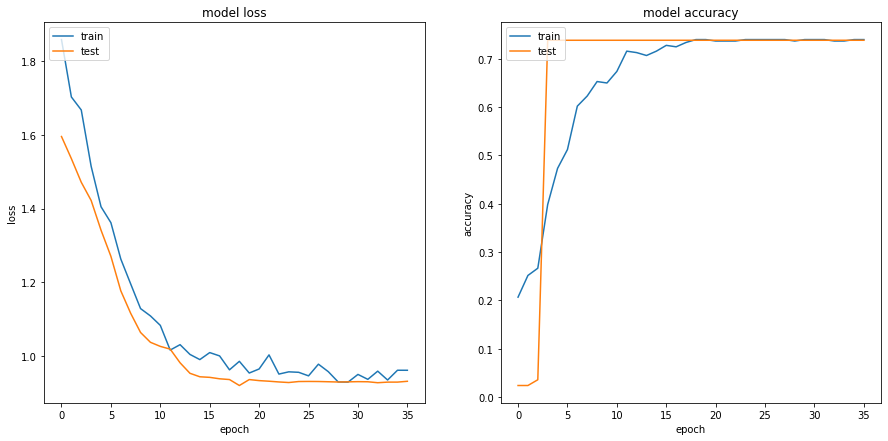

************ Summary ************
Train data - Loss : 0.903 , Accuracy : 0.74
Test data - Loss : 0.931 , Accuracy : 0.738
Recall : 0.738
Precision : 0.545
F1 score : 0.627


In [146]:
getNN_model(X_train_NN, y_train_NN, X_test_NN, y_test_NN, False)